# Result simulation

In [20]:
#!python
import numpy as np
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show, yscale, subplots
import scipy as sp
from scipy.fft import fft, fftfreq

def taps_int(taps):
    return (taps * 2**8).astype(int) 

#Fir filter implementation
def filter(wave, taps):
    result = []
    data = np.zeros(len(taps))
    for i in range(len(wave)):
        data = np.insert(data[:len(taps)-1],0,wave[i])
        result.append((taps*data).sum())
    return np.asarray(result)

## Wave creation

In [2]:
fs = 10000       # sampling rate, Hz, must be integer
duration = 0.1   # in seconds, may be float
f = 20       # sine frequency, Hz, may be float
samples = (np.sin(2*np.pi*np.arange(fs*duration)*f/fs)).astype(np.float32)

t = np.arange(fs*duration)/fs #Time mesh

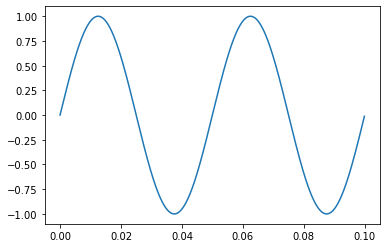

In [3]:
plot(t, samples)

## Noise addition

In [4]:
fs = 10000       # sampling rate, Hz, must be integer
duration = 0.1   # in seconds, may be float
f = 4000     # sine frequency, Hz, may be float
noise_samples = 0.1*(np.sin(2*np.pi*np.arange(fs*duration)*f/fs)).astype(np.float32)

In [5]:
wave = samples+ noise_samples

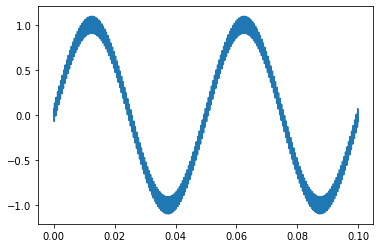

In [6]:
plot(t,wave)

## Frequency cut

In [7]:
# The cutoff frequency of the filter.
cutoff_hz = 30
#Taps number
N=5

taps = firwin(N, cutoff_hz, fs = fs, pass_zero = "lowpass")

fil = filter(wave,taps)

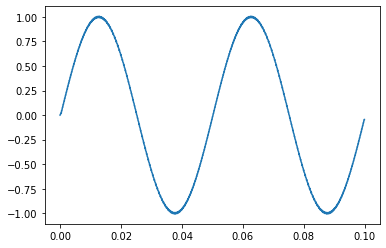

In [8]:
plot(t,fil)

# VHDL Comparison

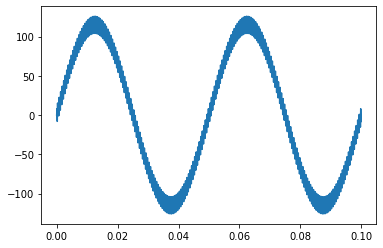

In [67]:
# Wave rescaled to get better results
plot(t, wave*115)

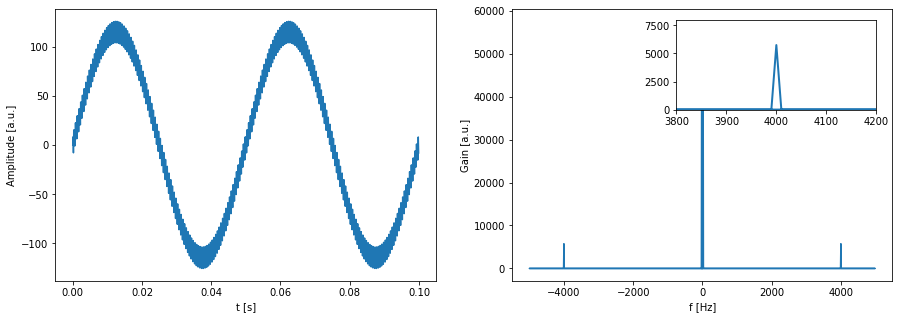

In [70]:
fig, ax = subplots(1,2, figsize = (15,5))

yf = fft(wave*115)
xf = fftfreq(N, 1/fs)

ax[0].set_xlabel("t [s]")
ax[0].set_ylabel("Amplitude [a.u.]")

ax[1].set_xlabel("f [Hz]")
ax[1].set_ylabel("Gain [a.u.]")

ax1 = axes([0.7, 0.6, .185, .25])
plot(xf,np.abs(yf), linewidth=2)
xlim(3800,4200)
ylim(-20,8000)

ax[0].plot(t,wave*115)
ax[1].plot(xf,np.abs(yf))

In [10]:
#Check over the maximum value of the wave
(wave*115).max()

125.90083

In [11]:
# Sampling the function
np.savetxt("input_vectors.txt",(wave*115).astype(int), fmt='%1.0f')

In [22]:
# Number of samples in normalized_tone
N = int(duration * fs)

### Standard FIR 

In [65]:
fir = np.loadtxt("Output/fir_output_results.txt")

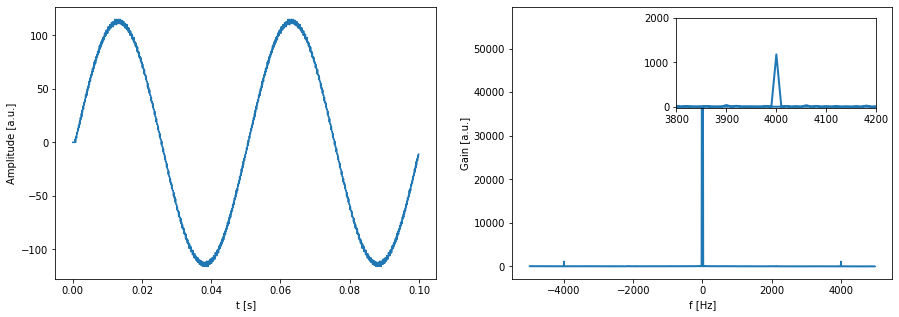

In [66]:
fig, ax = subplots(1,2, figsize = (15,5))

yf = fft(fir)
xf = fftfreq(N, 1/fs)

ax[0].set_xlabel("t [s]")
ax[0].set_ylabel("Amplitude [a.u.]")

ax[1].set_xlabel("f [Hz]")
ax[1].set_ylabel("Gain [a.u.]")

ax1 = axes([0.7, 0.6, .185, .25])
plot(xf,np.abs(yf), linewidth=2)
xlim(3800,4200)
ylim(-20,2000)

ax[0].plot(t,fir)
ax[1].plot(xf,np.abs(yf))

### FPGA FIR Method 1

In [14]:
fpgafir1 = np.loadtxt("Output/output_results_4_resize.txt")

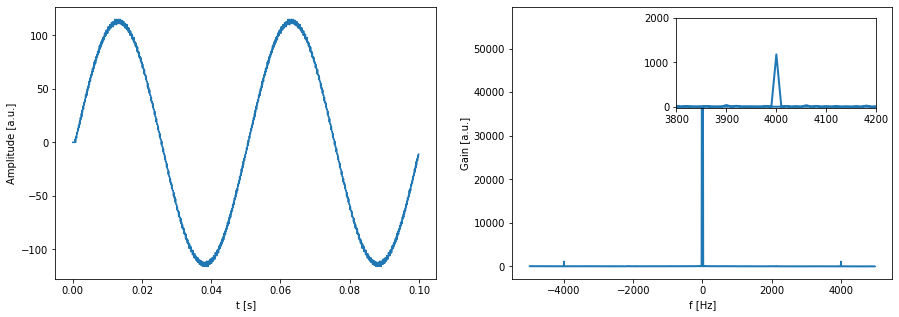

In [58]:
fig, ax = subplots(1,2, figsize = (15,5))

yf = fft(fpgafir1)
xf = fftfreq(N, 1/fs)

ax[0].set_xlabel("t [s]")
ax[0].set_ylabel("Amplitude [a.u.]")

ax[1].set_xlabel("f [Hz]")
ax[1].set_ylabel("Gain [a.u.]")

ax1 = axes([0.7, 0.6, .185, .25])
plot(xf,np.abs(yf), linewidth=2)
xlim(3800,4200)
ylim(-20,2000)

ax[0].plot(t,fpgafir1)
ax[1].plot(xf,np.abs(yf))

### FPGA FIR Method 2

In [59]:
fpgafir2 = np.loadtxt("Output/output_results_4_trunc_fpga.txt")

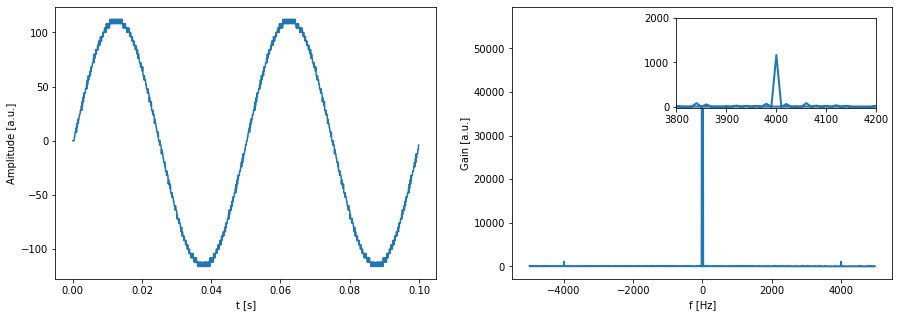

In [60]:
fig, ax = subplots(1,2, figsize = (15,5))

yf = fft(fpgafir2)
xf = fftfreq(N, 1/fs)

ax[0].set_xlabel("t [s]")
ax[0].set_ylabel("Amplitude [a.u.]")

ax[1].set_xlabel("f [Hz]")
ax[1].set_ylabel("Gain [a.u.]")

ax1 = axes([0.7, 0.6, .185, .25])
plot(xf,np.abs(yf), linewidth=2)
xlim(3800,4200)
ylim(-20,2000)

ax[0].plot(t,fpgafir2)
ax[1].plot(xf,np.abs(yf))

### FPGA FIR Method 3

In [61]:
fpgafir3 = np.loadtxt("Output/output_results_5_resize.txt")

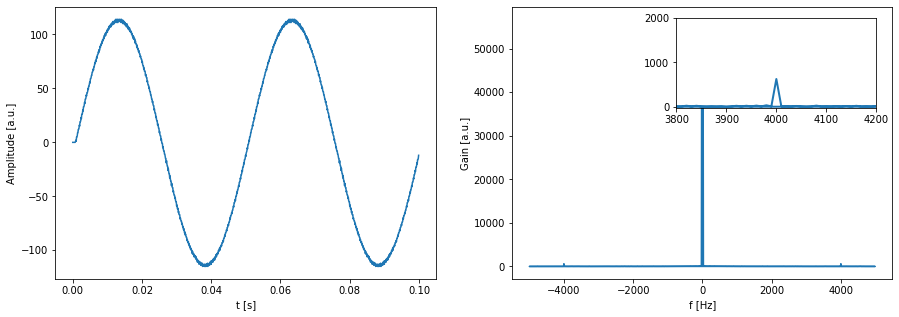

In [62]:
fig, ax = subplots(1,2, figsize = (15,5))

yf = fft(fpgafir3)
xf = fftfreq(N, 1/fs)

ax[0].set_xlabel("t [s]")
ax[0].set_ylabel("Amplitude [a.u.]")

ax[1].set_xlabel("f [Hz]")
ax[1].set_ylabel("Gain [a.u.]")

ax1 = axes([0.7, 0.6, .185, .25])
plot(xf,np.abs(yf), linewidth=2)
xlim(3800,4200)
ylim(-20,2000)

ax[0].plot(t,fpgafir3)
ax[1].plot(xf,np.abs(yf))

### FPGA FIR Method 4

In [63]:
fpgafir4 = np.loadtxt("Output/output_results_5_trunc.txt")

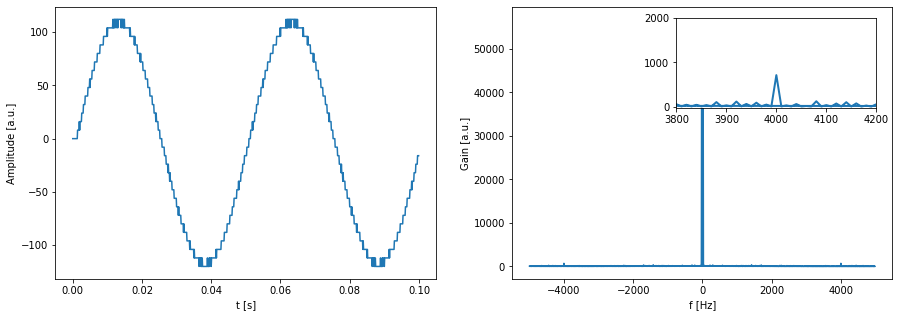

In [64]:
fig, ax = subplots(1,2, figsize = (15,5))

yf = fft(fpgafir4)
xf = fftfreq(N, 1/fs)

ax[0].set_xlabel("t [s]")
ax[0].set_ylabel("Amplitude [a.u.]")

ax[1].set_xlabel("f [Hz]")
ax[1].set_ylabel("Gain [a.u.]")

ax1 = axes([0.7, 0.6, .185, .25])
plot(xf,np.abs(yf), linewidth=2)
xlim(3800,4200)
ylim(-20,2000)

ax[0].plot(t,fpgafir4)
ax[1].plot(xf,np.abs(yf))